# Kaggle Challenge Dataset

The Kaggle Dataset only consists of neutrino events. <br>
For detailed information on data refer to:  https://www.kaggle.com/competitions/icecube-neutrinos-in-deep-ice/data <br>
For information on how to use sqlite3 see documentation: https://docs.python.org/3/library/sqlite3.html 
1) Fetching table and column names:

In [2]:
db_path = '/remote/ceph/user/o/oersoe/workshop/data/kaggle/first_4_batches.db'

In [3]:
import sqlite3
import pandas as pd
import numpy as np

con = sqlite3.connect(db_path)

# Getting table and column names 
query = 'select name from sqlite_master where type = "table"'
table_names = pd.read_sql(query,con)

for table_name in table_names['name']:
    print("Table name:", table_name)
    # Getting column names of table
    query = f"SELECT * FROM {table_name} LIMIT 1"
    column_names = pd.read_sql(query,con).columns
    print("Column names:", np.array(column_names))

Table name: meta_table
Column names: ['batch_id' 'event_id' 'first_pulse_index' 'last_pulse_index' 'azimuth'
 'zenith']
Table name: pulse_table
Column names: ['event_id' 'sensor_id' 'time' 'charge' 'auxiliary' 'x' 'y' 'z']


2) Plotting distribution of xyz-coordinates of sensors 

0
1
2


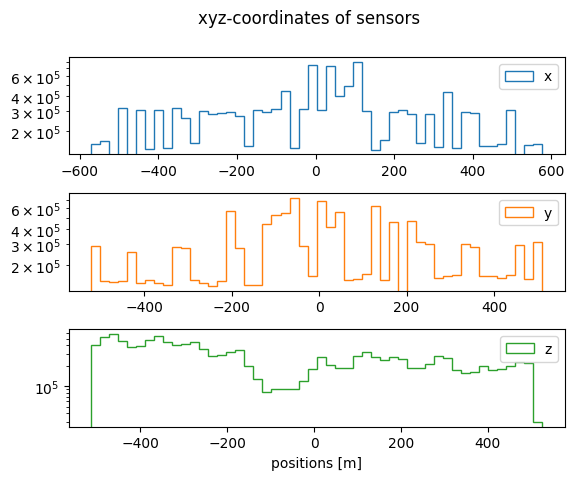

In [4]:
# WARNING: This cell can take up to 5 minutes to run! 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

bins = 50
fig, ax = plt.subplots(3)
colors = ['tab:blue', 'tab:orange', 'tab:green']
query = 'SELECT event_id FROM meta_table'
event_nos = pd.read_sql(query,con).sample(frac= 0.1).reset_index(drop = True)
for count, i in enumerate(['x','y','z']):
    query = f'SELECT {i} FROM pulse_table WHERE event_id in {str(tuple(event_nos["event_id"]))}'
    column_data = pd.read_sql(query,con)
    print(count)
    ax[count].hist(column_data, histtype = 'step', label= i, bins=bins, color=colors[count])
    ax[count].legend()
    ax[count].set_yscale('log')


# Show plot
fig.suptitle("xyz-coordinates of sensors")
plt.subplots_adjust(hspace=0.4)
plt.xlabel('positions [m]')

plt.show()
 

3) Plotting distribution of azimuth and zenith angle

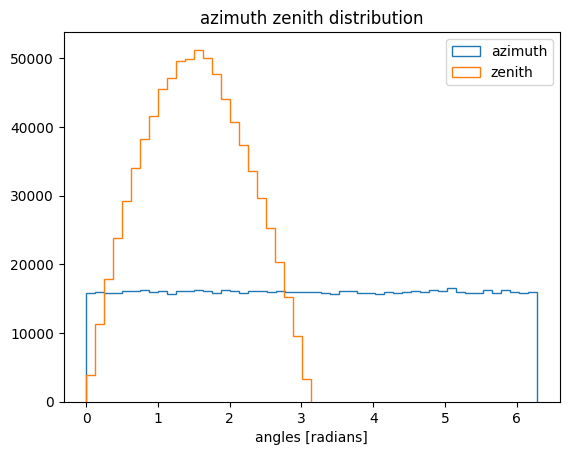

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

bins = [50,25]

for count, i in enumerate(['azimuth', 'zenith']):
    sql = f"SELECT {i} FROM meta_table"
    column_data = pd.read_sql(sql, con)
    plt.hist(column_data, histtype = 'step', label= i, bins=bins[count])

# Show plot
plt.title("azimuth zenith distribution")
plt.legend()
plt.xlabel('angles [radians]')
plt.show()
